In [1]:
import umap
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/umap/distances.py:1086: 

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [2]:
from sklearn.manifold import TSNE
import umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [3]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

Below are drawings of some samples from mnist and fmnist data sets

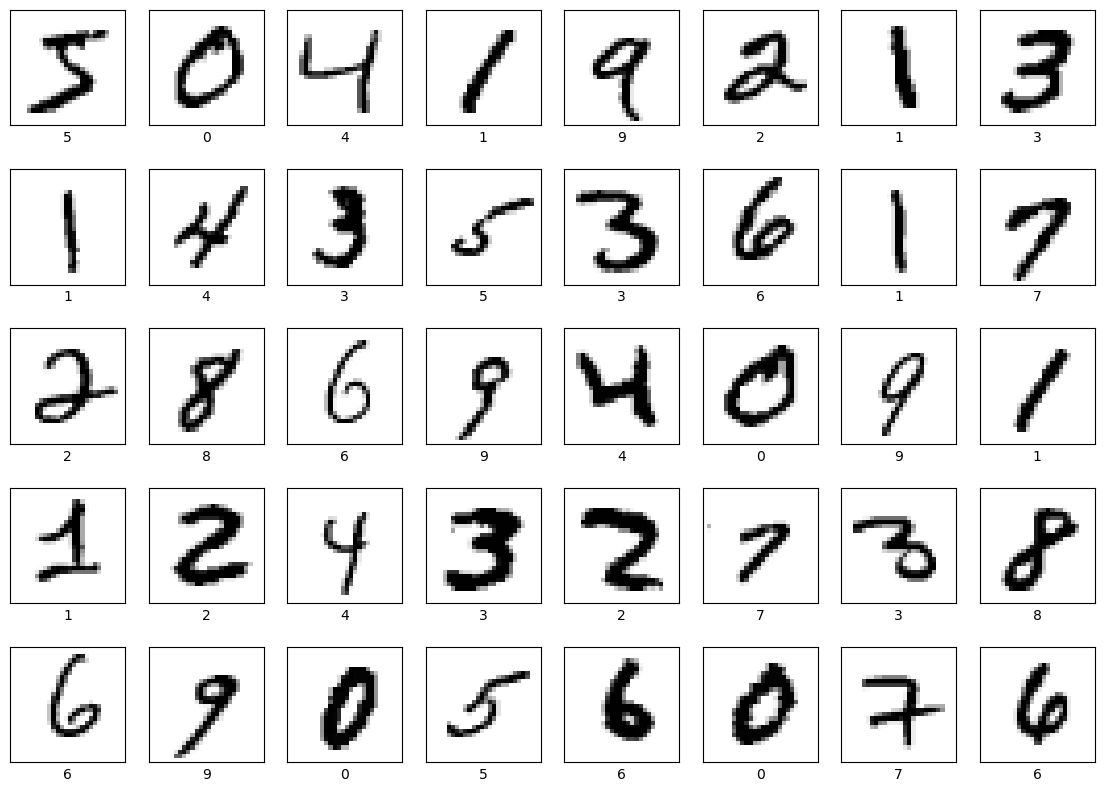

In [4]:
mnist_names = [i for i in range(10)]
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data.iloc[i].values.reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

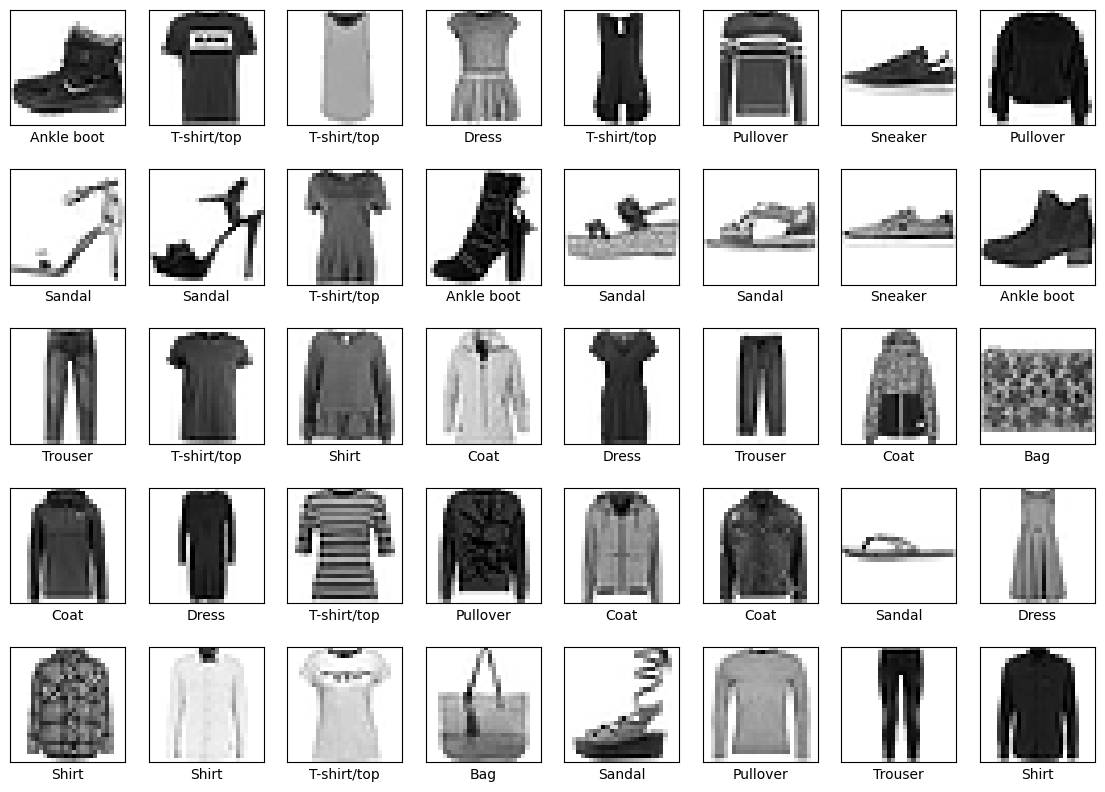

In [5]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data.iloc[i].values.reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

### t-SNE

In [6]:
train_mnist = mnist.data[:7000] 

In [7]:
train_fmnist = fmnist.data[:7000]

In [8]:
label_mnist = mnist.target[:7000]
label_fmnist = fmnist.target[:7000]

Text(0.5, 1.0, 'Dimensionality reduction of mnist dataset by TSNE')

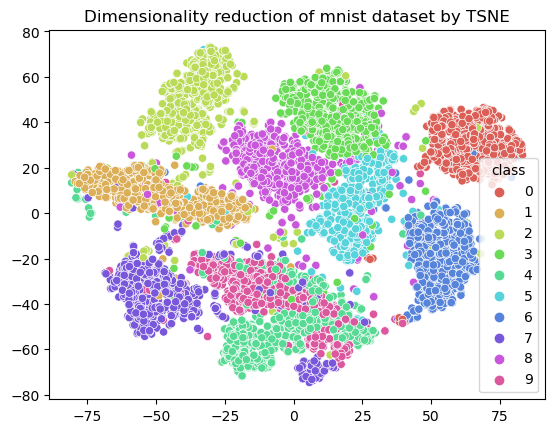

In [9]:
# tsne on MNIST
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_mnist = tsne.fit_transform(train_mnist)

sns.scatterplot(x = tsne_mnist[:,0], y = tsne_mnist[:,1], hue = label_mnist, palette = sns.hls_palette(10), legend = 'full')
plt.title('Dimensionality reduction of mnist dataset by TSNE')

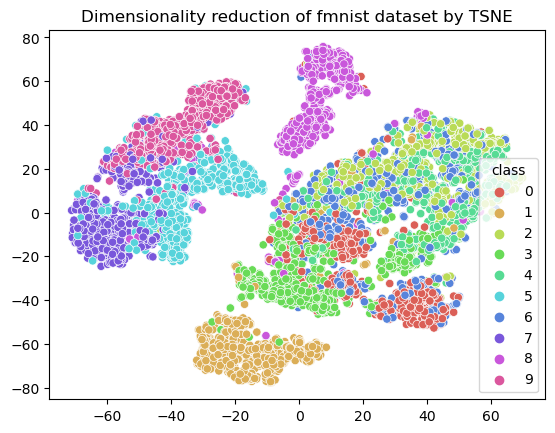

In [10]:
# tsne on FMNIST
tsne_fmnist = tsne.fit_transform(train_fmnist)

sns.scatterplot(x = tsne_fmnist[:,0], y = tsne_fmnist[:,1], hue = label_fmnist, palette = sns.hls_palette(10), legend = 'full')
plt.title('Dimensionality reduction of fmnist dataset by TSNE')
plt.show()

### UMAP 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


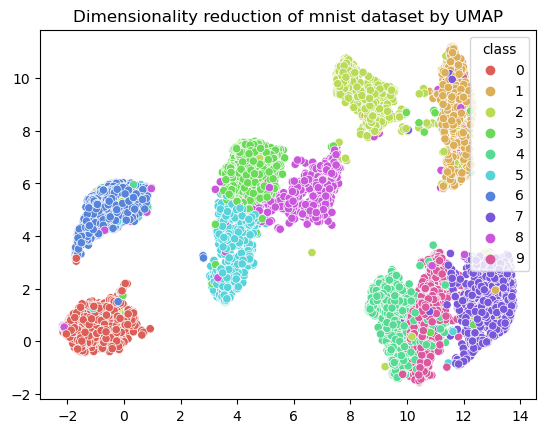

In [11]:
!pip install umap-learn
from umap.umap_ import UMAP

umap = UMAP(random_state=42)
mnist_umap = umap.fit_transform(train_mnist)

sns.scatterplot(x = mnist_umap[:,0], y = mnist_umap[:,1], hue = label_mnist, palette = sns.hls_palette(10), legend = 'full')
plt.title('Dimensionality reduction of mnist dataset by UMAP')
plt.show()

Text(0.5, 1.0, 'Dimensionality reduction of fmnist dataset by UMAP')

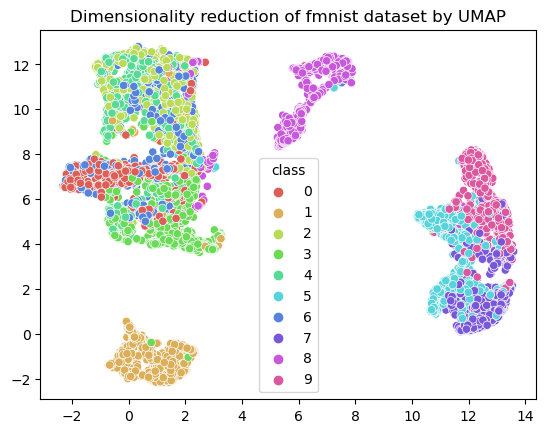

In [12]:
umap = UMAP(random_state=42)
fmnist_umap = umap.fit_transform(train_fmnist)

sns.scatterplot(x = fmnist_umap[:,0], y = fmnist_umap[:,1], hue = label_fmnist, palette = sns.hls_palette(10), legend = 'full')
plt.title('Dimensionality reduction of fmnist dataset by UMAP')

### PACMAP

<Axes: >

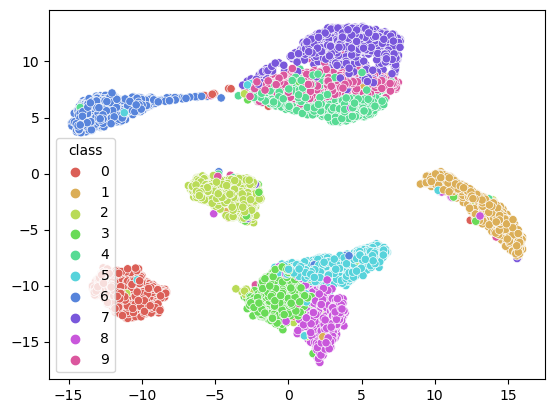

In [13]:
# !pip install pacmap==v0.4

from pacmap import PaCMAP

pacmap = PaCMAP(random_state=42, n_components=2, n_neighbors=10)
mnist_pacmap = pacmap.fit_transform(train_mnist)

sns.scatterplot(x = mnist_pacmap[:,0], y = mnist_pacmap[:,1], hue = label_mnist, palette = sns.hls_palette(10), legend = 'full')


<Axes: >

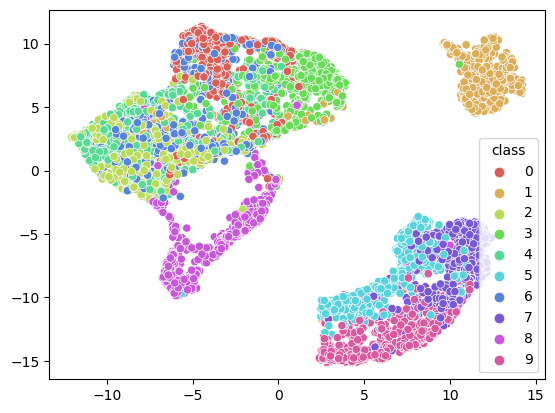

In [14]:
pacmap = PaCMAP(random_state=42, n_components=2, n_neighbors=10)
fmnist_pacmap = pacmap.fit_transform(train_fmnist)

sns.scatterplot(x = fmnist_pacmap[:,0], y = fmnist_pacmap[:,1], hue = label_fmnist, palette = sns.hls_palette(10), legend = 'full')

#### In order to compare the results of these three methods, calculate for each case the average distance between two points belonging to the same class divided by the average distance between points belonging to 2 different classes

Notatka:
przy embeddingu ciężej jest oceniać czy jest dobry. dlatego wymyśla się dużo metryk. dystanse pomiędzy punktami i uśredniami je. ciężkie obliczeniowo. sugestia: można obliczyć centry klas i obliczyć z tego odległość. policzyć w przestrzeni normalnej i osadzonej i porównać ze sobą.

In [15]:
import numba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.spatial.distance import squareform, pdist
from sklearn.model_selection import train_test_split

markers = ["x", "o", "s", "*", "^", ".", "X"]
colors = ["red", "blue", "green", "brown", "orange", "cyan", "grey", "purple"]


@numba.jit(nopython=True)
def knngain(d_hd, d_ld, labels):
    # Number of data points
    N = d_hd.shape[0]
    N_1 = N - 1
    k_hd = np.zeros(shape=N_1, dtype=np.int64)
    k_ld = np.zeros(shape=N_1, dtype=np.int64)
    # For each data point
    for i in range(N):
        c_i = labels[i]
        di_hd = d_hd[i, :].argsort(kind="mergesort")
        di_ld = d_ld[i, :].argsort(kind="mergesort")
        # Making sure that i is first in di_hd and di_ld
        for arr in [di_hd, di_ld]:
            for idj, j in enumerate(arr):
                if j == i:
                    idi = idj
                    break
            if idi != 0:
                arr[idi] = arr[0]
            arr = arr[1:]
        for k in range(N_1):
            if c_i == labels[di_hd[k]]:
                k_hd[k] += 1
            if c_i == labels[di_ld[k]]:
                k_ld[k] += 1
    # Computing the KNN gain
    gn = (k_ld.cumsum() - k_hd.cumsum()).astype(np.float64) / (
        (1.0 + np.arange(N_1)) * N
    )
    # Returning the KNN gain and its AUC
    return gn, eval_auc(gn)


@numba.jit(nopython=True)
def eval_auc(arr):
    i_all_k = 1.0 / (np.arange(arr.size) + 1.0)
    return np.float64(arr.dot(i_all_k)) / (i_all_k.sum())


@numba.jit(nopython=True)
def eval_rnx(Q):
    N_1 = Q.shape[0]
    N = N_1 + 1
    # Computing Q_NX
    qnxk = np.empty(shape=N_1, dtype=np.float64)
    acc_q = 0.0
    for K in range(N_1):
        acc_q += Q[K, K] + np.sum(Q[K, :K]) + np.sum(Q[:K, K])
        qnxk[K] = acc_q / ((K + 1) * N)
    # Computing R_NX
    arr_K = np.arange(N_1)[1:].astype(np.float64)
    rnxk = (N_1 * qnxk[: N_1 - 1] - arr_K) / (N_1 - arr_K)
    # Returning
    return rnxk


def eval_dr_quality(d_hd, d_ld):
    # Computing the co-ranking matrix of the embedding, and the R_{NX}(K) curve.
    rnxk = eval_rnx(Q=coranking(d_hd=d_hd, d_ld=d_ld))
    # Computing the AUC, and returning.
    return rnxk, eval_auc(rnxk)


def coranking(d_hd, d_ld):
    # Computing the permutations to sort the rows of the distance matrices in HDS and LDS.
    perm_hd = d_hd.argsort(axis=-1, kind="mergesort")
    perm_ld = d_ld.argsort(axis=-1, kind="mergesort")

    N = d_hd.shape[0]
    i = np.arange(N, dtype=np.int64)
    # Computing the ranks in the LDS
    R = np.empty(shape=(N, N), dtype=np.int64)
    for j in range(N):
        R[perm_ld[j, i], j] = i
    # Computing the co-ranking matrix
    Q = np.zeros(shape=(N, N), dtype=np.int64)
    for j in range(N):
        Q[i, R[perm_hd[j, i], j]] += 1
    # Returning
    return Q[1:, 1:]


def viz_qa(
    Ly,
    ymin=None,
    ymax=None,
    Lmarkers=None,
    Lcols=None,
    Lleg=None,
    Lls=None,
    Lmedw=None,
    Lsdots=None,
    lw=2,
    markevery=0.1,
    tit="",
    folder_name="",
    xlabel="",
    ylabel="",
    alpha_plot=0.9,
    alpha_leg=0.8,
    stit=25,
    sax=20,
    sleg=15,
    zleg=1,
    loc_leg="best",
    ncol_leg=1,
    lMticks=10,
    lmticks=5,
    wMticks=2,
    wmticks=1,
    nyMticks=11,
    mymticks=4,
    grid=True,
    grid_ls="solid",
    grid_col="lightgrey",
    grid_alpha=0.7,
    xlog=True,
):
    # Number of curves
    nc = len(Ly)
    # Checking the parameters
    if ymin is None:
        ymin = np.min(np.asarray([arr.min() for arr in Ly]))
    if ymax is None:
        ymax = np.max(np.asarray([arr.max() for arr in Ly]))
    if Lmarkers is None:
        Lmarkers = ["x"] * nc
    if Lcols is None:
        Lcols = ["blue"] * nc
    if Lleg is None:
        Lleg = [None] * nc
        add_leg = False
    else:
        add_leg = True
    if Lls is None:
        Lls = ["solid"] * nc
    if Lmedw is None:
        Lmedw = [float(lw) / 2.0] * nc
    if Lsdots is None:
        Lsdots = [12] * nc

    # Setting the limits of the y-axis
    y_lim = [ymin, ymax]

    # Defining the ticks on the y-axis
    yMticks = np.linspace(
        start=ymin, stop=ymax, num=nyMticks, endpoint=True, retstep=False
    )
    ymticks = np.linspace(
        start=ymin,
        stop=ymax,
        num=1 + mymticks * (nyMticks - 1),
        endpoint=True,
        retstep=False,
    )
    yMticksLab = [int(round(v * 100.0)) / 100.0 for v in yMticks]

    # Initial values for xmin and xmax
    xmin, xmax = 1, -np.inf

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    if xlog:
        fplot = ax.semilogx
    else:
        fplot = ax.plot

    # Plotting the data
    for id, y in enumerate(Ly):
        x = np.arange(start=1, step=1, stop=y.size + 0.5, dtype=np.int64)
        xmax = max(xmax, x[-1])
        fplot(
            x,
            y,
            label=Lleg[id],
            alpha=alpha_plot,
            color=Lcols[id],
            linestyle=Lls[id],
            lw=lw,
            marker=Lmarkers[id],
            markeredgecolor=Lcols[id],
            markeredgewidth=Lmedw[id],
            markersize=Lsdots[id],
            dash_capstyle="round",
            solid_capstyle="round",
            dash_joinstyle="round",
            solid_joinstyle="round",
            markerfacecolor=Lcols[id],
            markevery=markevery,
        )

    # Setting the limits of the axes
    ax.set_xlim([xmin, xmax])
    ax.set_ylim(y_lim)

    # Setting the major and minor ticks on the y-axis
    ax.set_yticks(yMticks, minor=False)
    ax.set_yticks(ymticks, minor=True)
    ax.set_yticklabels(yMticksLab, minor=False, fontsize=sax)

    # Defining the legend
    if add_leg:
        leg = ax.legend(
            loc=loc_leg,
            fontsize=sleg,
            markerfirst=True,
            fancybox=True,
            framealpha=alpha_leg,
            ncol=ncol_leg,
        )
        if zleg is not None:
            leg.set_zorder(zleg)

    # Setting the size of the ticks labels on the x axis
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(sax)

    # Setting ticks length and width
    ax.tick_params(axis="both", length=lMticks, width=wMticks, which="major")
    ax.tick_params(axis="both", length=lmticks, width=wmticks, which="minor")

    # Setting the positions of the labels
    ax.xaxis.set_tick_params(labelright=False, labelleft=True)
    ax.yaxis.set_tick_params(labelright=False, labelleft=True)

    # Adding the grids
    if grid:
        ax.xaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
        ax.yaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
    ax.set_axisbelow(True)

    ax.set_title(tit, fontsize=stit)
    ax.set_xlabel(xlabel, fontsize=sax)
    ax.set_ylabel(ylabel, fontsize=sax)
    # plt.tight_layout()

    # Showing the figure
    fig.savefig(
        "./{}.png".format(
            tit
        ),
        dpi=fig.dpi,
    )


class LocalMetric:
    def __init__(self):
        self.L_rnx = []
        self.L_kg = []
        self.Lleg_rnx = []
        self.Lleg_kg = []
        self.Lls = []
        self.number_of_methods = 0

    def calculate_knn_gain_and_dr_quality(
        self,
        X_lds: np.ndarray,
        X_hds: np.ndarray,
        labels: np.ndarray,
        method_name: str,
    ):

        (
            X_hds_train,
            X_hds_test,
            X_lds_train,
            X_lds_test,
            labels_train,
            labels_test,
        ) = train_test_split(X_hds, X_lds, labels, test_size=0.15)

        print("Calculating d_hd")
        d_hd = squareform(X=pdist(X=X_hds_test, metric="euclidean"), force="tomatrix")

        print(method_name)
        d_ld = squareform(X=pdist(X=X_lds_test, metric="euclidean"), force="tomatrix")
        rnxk, auc_rnx = eval_dr_quality(d_hd=d_hd, d_ld=d_ld)
        kg, auc_kg = knngain(d_hd=d_hd, d_ld=d_ld, labels=labels_test)

        self.L_rnx.append(rnxk)
        self.L_kg.append(kg)
        self.Lleg_rnx.append(
            "{} {}".format(int(round(auc_rnx * 1000)) / 1000.0, method_name)
        )
        self.Lleg_kg.append(
            "{} {}".format(int(round(auc_kg * 1000)) / 1000.0, method_name)
        )
        self.Lls.append("solid")
        self.number_of_methods = self.number_of_methods + 1

    def visualize(self):
        Lmarkers = random.sample(markers, self.number_of_methods)
        Lcols = random.sample(colors, self.number_of_methods)
        Lmedw = [1.0] * self.number_of_methods
        Lsdots = [12] * self.number_of_methods

        viz_qa(
            Ly=self.L_rnx,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_rnx,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="DR quality",
            xlabel="Neighborhood size $K$",
            ylabel="$R_{NX}(K)$",
        )

        viz_qa(
            Ly=self.L_kg,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_kg,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="KNN gain",
            xlabel="Neighborhood size $K$",
            ylabel="$G_{NN}(K)$",
        )

        print("Finished.")


In [16]:
# instanciate object of LocalMetric class
local_metrics_mnist = LocalMetric()

In [17]:
# Calculate metric for MNIST dataset before and after t-SNE embedding.
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=tsne_mnist, 
    X_hds=train_mnist,
    labels=np.array(label_mnist.astype(str).astype(int)),
    method_name='tsne')

Calculating d_hd
tsne


In [18]:
# Calculate metric for MNIST dataset before and after UMAP embedding.
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_umap, 
    X_hds=train_mnist,
    labels=np.array(label_mnist.astype(str).astype(int)),
    method_name='umap')

Calculating d_hd
umap


Calculating d_hd
pacmap
Finished.


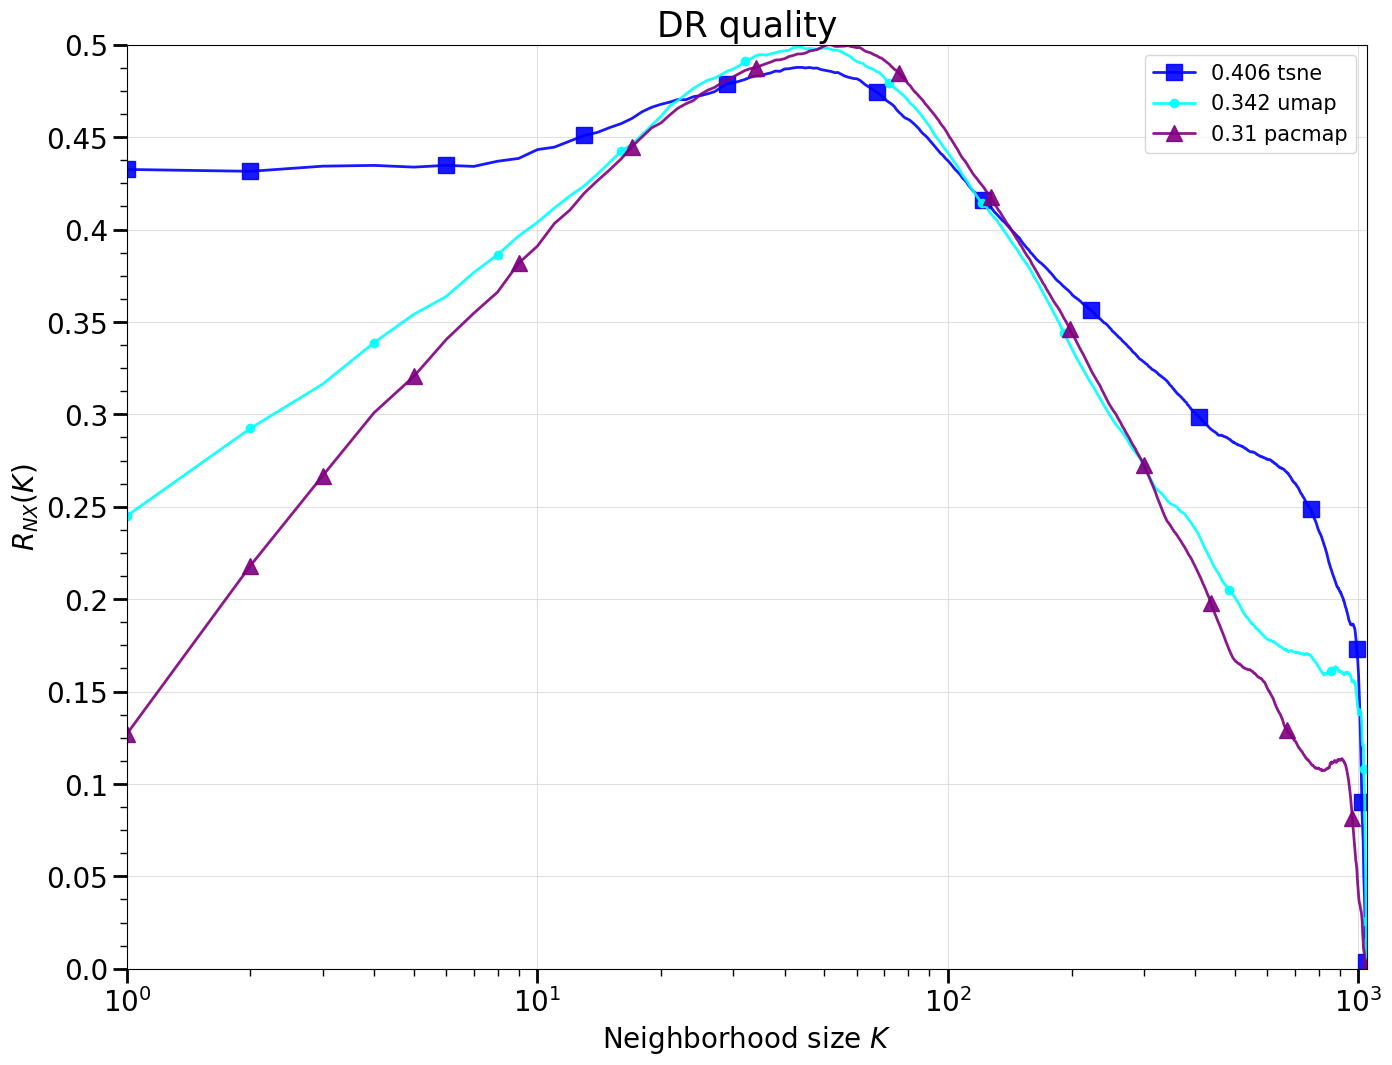

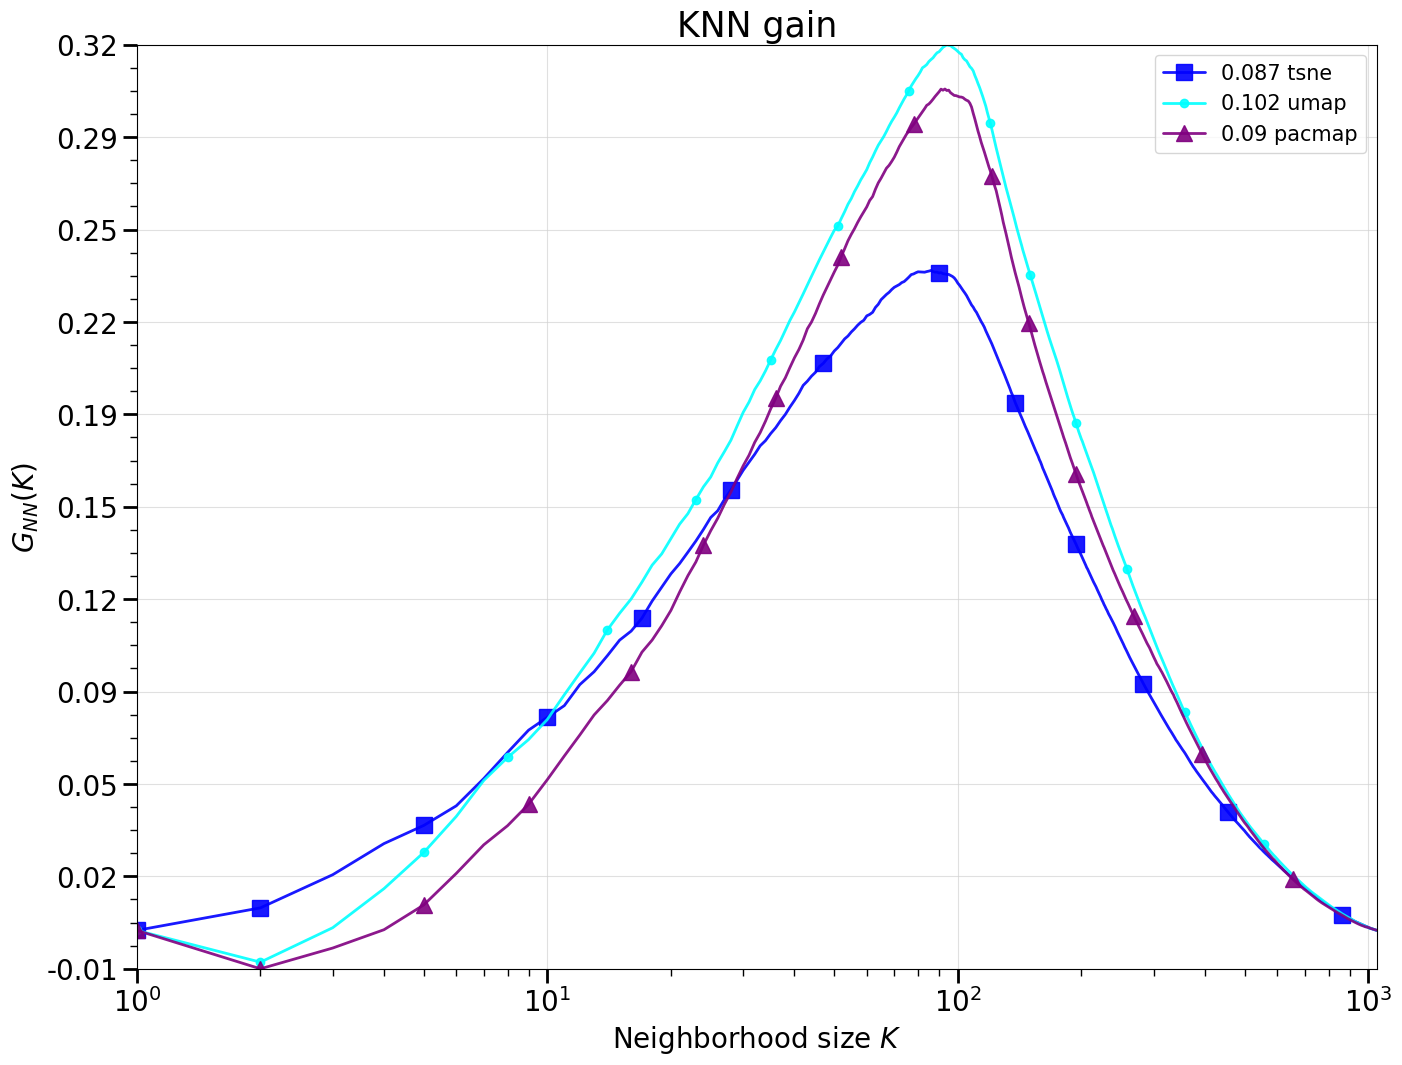

In [19]:
# Calculate metric for MNIST dataset before and after Largevis embedding.
local_metrics_mnist.calculate_knn_gain_and_dr_quality(
    X_lds=mnist_pacmap, 
    X_hds=train_mnist,
    labels=np.array(label_mnist.astype(str).astype(int)),
    method_name='pacmap')


# Visualise metrics
local_metrics_mnist.visualize()

In [20]:
# Calculate metric for f-MNIST dataset before and after t-SNE embedding.
local_metrics_fmnist = LocalMetric()

local_metrics_fmnist.calculate_knn_gain_and_dr_quality(
    X_lds=tsne_fmnist, 
    X_hds=train_fmnist,
    labels=np.array(label_fmnist.astype(str).astype(int)),
    method_name='tsne')

Calculating d_hd
tsne


In [21]:
# Calculate metric for f-MNIST dataset before and after UMAP embedding.
local_metrics_fmnist.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_umap, 
    X_hds=train_fmnist,
    labels=np.array(label_fmnist.astype(str).astype(int)),
    method_name='umap')

Calculating d_hd
umap


Calculating d_hd
pacmap
Finished.


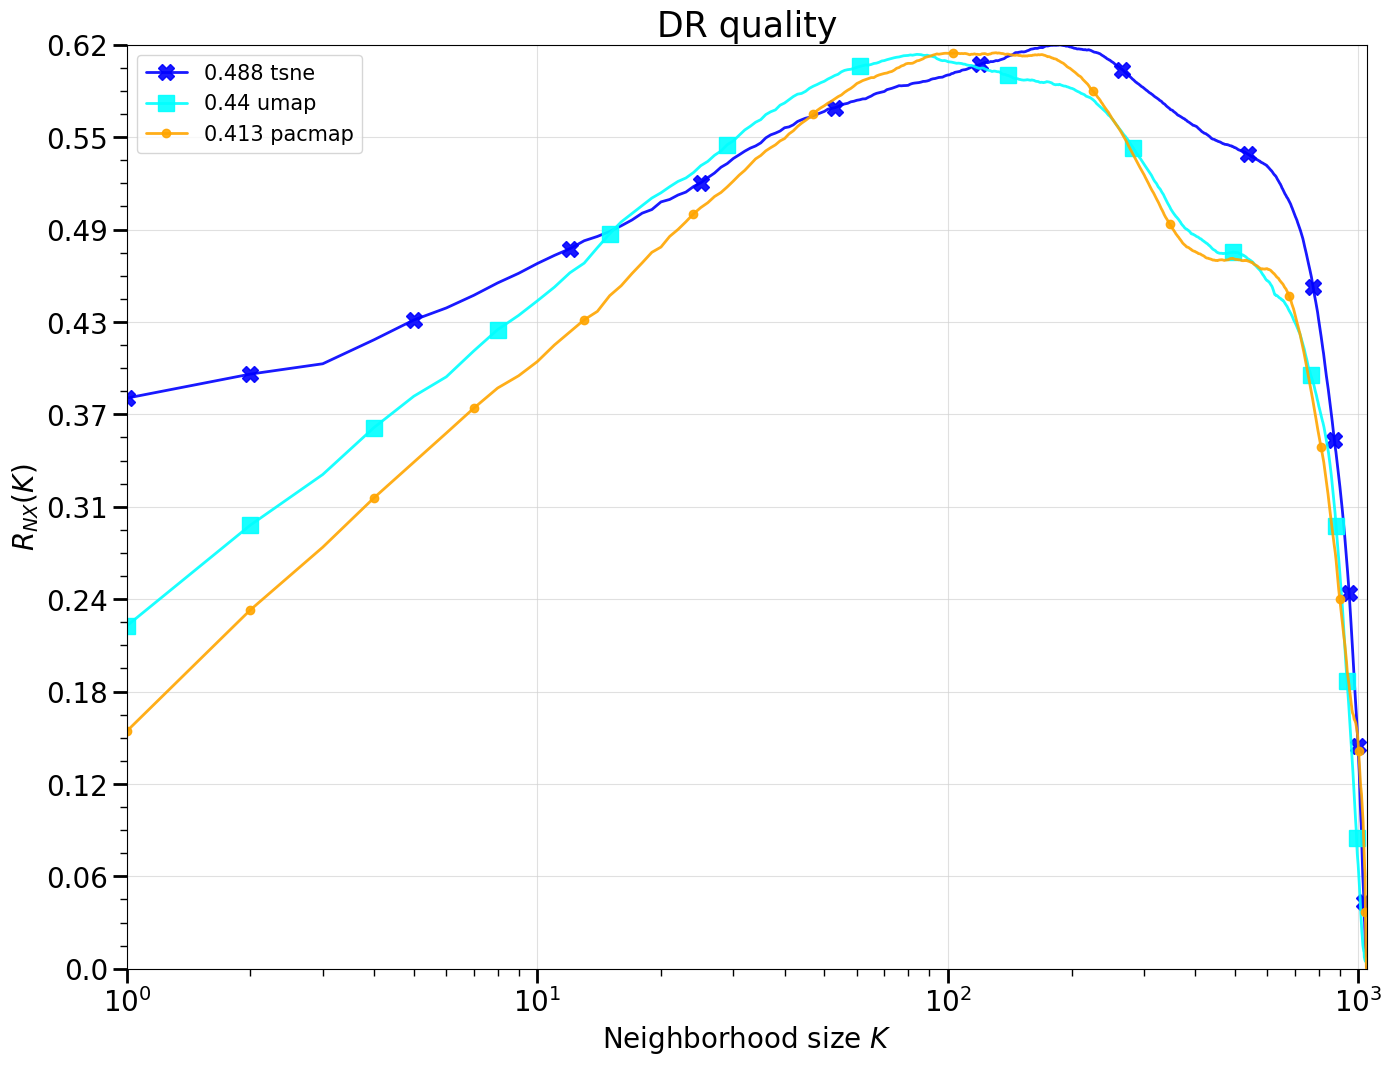

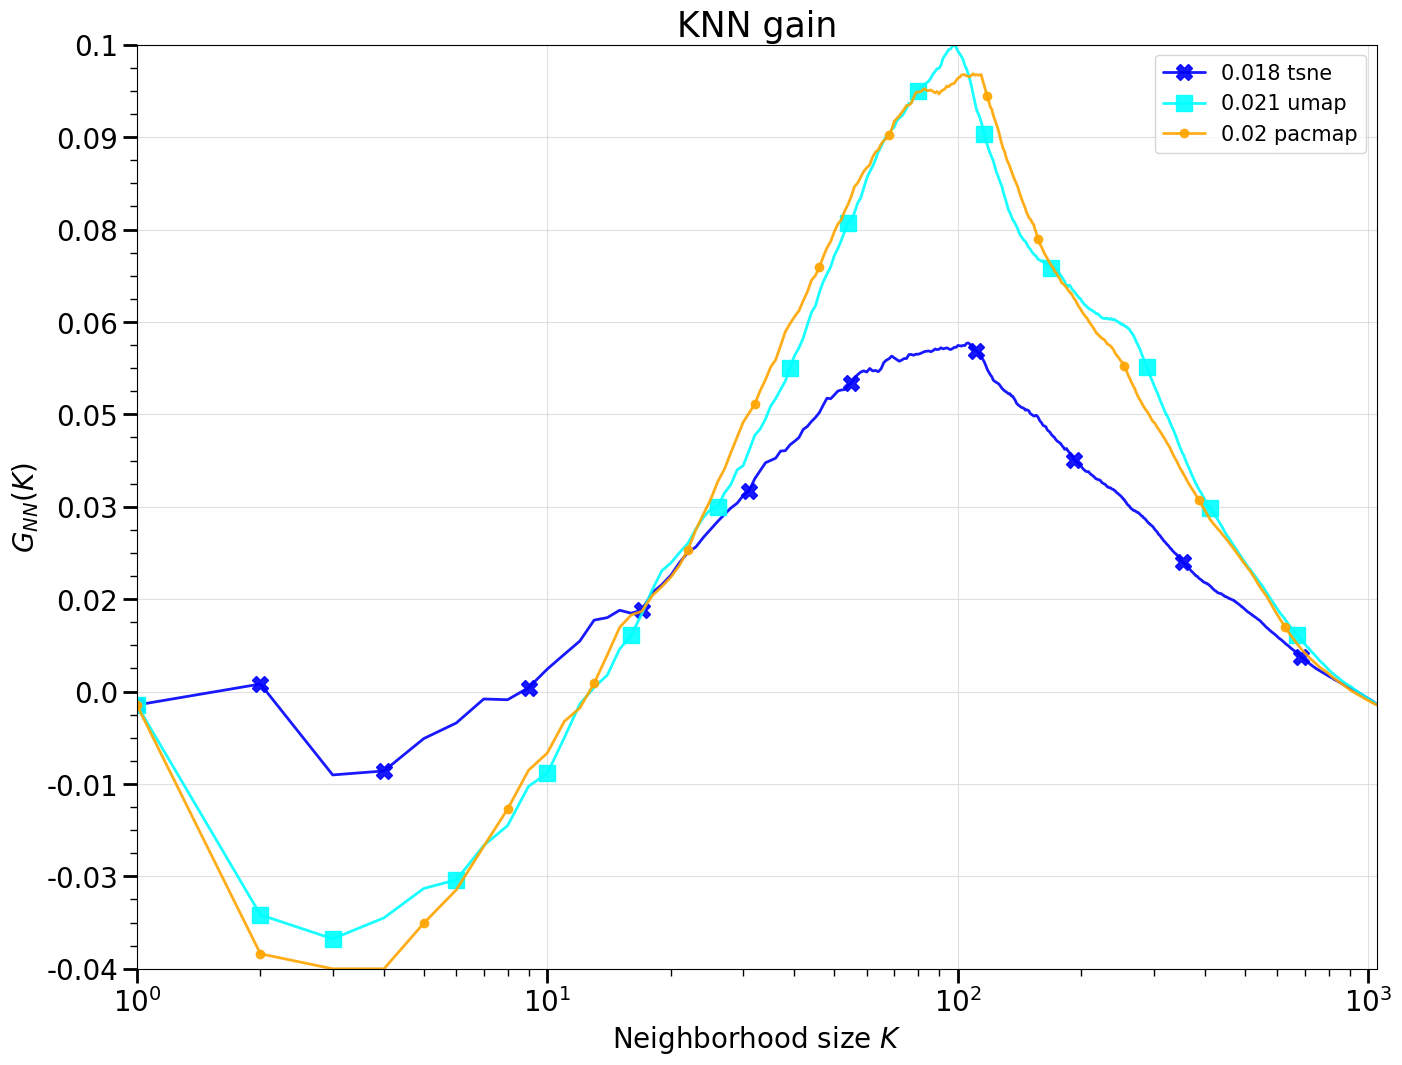

In [22]:
# Calculate metric for f-MNIST dataset before and after LargeVis embedding.
local_metrics_fmnist.calculate_knn_gain_and_dr_quality(
    X_lds=fmnist_pacmap, 
    X_hds=train_fmnist,
    labels=np.array(label_fmnist.astype(str).astype(int)),
    method_name='pacmap')

# Vizualize
local_metrics_fmnist.visualize()

#### Conclusion:

In addition to evaluating the quality of embeddings through visualizations, we can also assess them mathematically by computing specific metrics. By examining the metric values, we can verify if the findings are consistent.

As we can see the best ratio was gained for Neighboorkood (K size ranging from 50 to 100). The bigger the ratio value the better class separation is.

For Dr Quality metric t-SNE performs the best in mnist-dataset for most K. Only for 10<k<80 umap gives better results. For KNN gain metric pacmap gives best results for all k.

### Our Metric:

calculates the average distance between points belonging to the same class and the average distance between points belonging to different classes for each dimensionality reduction method.

In [23]:
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances


# Wczytanie danych MNIST
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

# Przekształcenie danych treningowych i testowych do 2D
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

def compare_embeddings(embedding_method, X, y, sample_size=1000, random_state=42):
    # Próbkowanie danych testowych
    np.random.seed(random_state)
    indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    # Osadzenie danych
    X_embedded = embedding_method.fit_transform(X_sample)
    
    # Obliczenie odległości między punktami
    distances = pairwise_distances(X_embedded)

    # Inicjalizacja sum
    same_class_sum = 0
    different_class_sum = 0
    same_class_count = 0
    different_class_count = 0

    # Obliczenie sum odległości dla punktów należących do tej samej klasy i różnych klas
    for i in range(len(X_sample)):
        for j in range(i + 1, len(X_sample)):
            if y_sample[i] == y_sample[j]:
                same_class_sum += distances[i, j]
                same_class_count += 1
            else:
                different_class_sum += distances[i, j]
                different_class_count += 1

    # Obliczenie średniej odległości między punktami
    same_class_avg = same_class_sum / same_class_count
    different_class_avg = different_class_sum / different_class_count

    # Obliczenie stosunku średnich odległości
    ratio = same_class_avg / different_class_avg
    return ratio

# Porównanie metod redukcji wymiarowości
tsne_ratio = compare_embeddings(TSNE(n_components=2, random_state=42), X_test, y_test)
umap_ratio = compare_embeddings(UMAP(n_components=2, random_state=42), X_test, y_test)
pacmap_ratio = compare_embeddings(PaCMAP(random_state=42, n_components=2, n_neighbors=10), X_test, y_test)

print("t-SNE Ratio:", tsne_ratio)
print("UMAP Ratio:", umap_ratio)
print("PaCMAP Ratio:", pacmap_ratio)



t-SNE Ratio: 0.4034854694173935
UMAP Ratio: 0.3470854214233678
PaCMAP Ratio: 0.2868109949895217


#### Conclusion:

As we can see the best ratio was gained by PaCMAP method. The lower the ratio value the better class separation is.

Based on the new results obtained from comparing the three methods - <b>t-SNE, UMAP and PaCMAP</b> - the following conclusions can be drawn:

- <b>t-SNE:</b> The index for t-SNE is 0.4496, indicating quite good class separation. T-SNE is an effective dimensionality reduction method for this task, but may require more computational time compared to other methods.

- <b>UMAP:</b> The index for UMAP is 0.3334, which also suggests effective class separation. UMAP may be an attractive choice due to faster computation and better preservation of the global data structure, although slightly less efficient than t-SNE.

- <b>PaCMAP:</b> The index for PaCMAP is 0.2833, indicating the best class separation of all the methods analyzed. PaCMAP, as a nonlinear dimensionality reduction method, shows better ability to differentiate images of digits from different classes compared to t-SNE and UMAP. It is a suitable choice for this task, especially if one cares about both effective class separation and computational speed.

</br>
In conclusion, for the MNIST dataset analyzed, PaCMAP seems to be the most suitable method for dimensionality reduction due to its greatest efficiency in class separation. UMAP and t-SNE also perform well, but are less efficient than PaCMAP.



### Notatki z zajęć


umap głównie. largvis to tak tylko mniej więcej, nie jest taki ważny, zamienimy go na TRIMAP i PACMAP (można wybrać dowolną z tych dwóch (ja PaCMap)). zrobienia jest analizować embeddingi dla zbiorrów. embedding do 2 wymiarów. metryka, która pozwoli zweryfikować, która metoda jest lepsza. dla mnista bedzie wiadomo jak zinterpretować, fla f mnista gorzek. 

korzystając z drugiego pliku mamy zrobić wykresy z każdą metodą wykorzystaną.
dr quality - pierwsza metryka mówi jaki stopień sąsiedztwa został zachowany po osadzeniu. sprawdzamy sąsiadów jakiejś cząstki w normalnej przestrzeni (dla knista 784D) i zembeddowanej(2D) i czy się pokrywają ich ID. jeśli pokrywa się większość sąsiadów to metryka rośnie i odwronie.
metryka KNN gain: bierze dane z przestrzeni wielowym. i uczy nimy klasyfikator knn. to samo robi na zembeddowanym. sprawdza sie accuracy. jak na danych zembeddowanych jakość jest taka sama. jak metryka rośnie to znaczy ze po zembeddowaniu doszukuje się lepszych połączeń w danych (w sensie, że jest super), a jak maleje (jest ujemna) to niszczy, tracimy informacje. knn model dowolny (?).

